In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams["font.size"] = 14

In [2]:
c = 3*1e8
e = 1.6*1e-19
m=9.1*1e-31
lambda0 = 1e-6
tau=lambda0/c
las_time = 20*tau
omega0 = 2*np.pi*c/lambda0
Er = m * omega0 * c / e
nx = 16000
t_end =40*tau
dt_snapshot = 0.08e-15
x_min = -20*lambda0
x_max = 20*lambda0
factor =4
epsilon = 8.85418782e-12
nc = epsilon*m*omega0**2/e**2
n0 = factor*nc

## Envelope

The envelope of the incident laser field varies according to
$$
    P(t)=
    \begin{cases}
         & e^{\frac{-(t-T/2)^2}{2(0.15)^2}} \text{ for } 0 \leq t \le T \\
         & 0         \;      \text{ otherwise }
    \end{cases}
$$

In [3]:
t_max = las_time
samples = 1000

In [4]:
def gaus_env(t):
    if t<las_time:
        n=(t-0.5*las_time)**2
        d = 2*(0.15*las_time)**2
        a  = np.sin(2*np.pi*t/tau)
        # a =1
        return a*np.exp(-(n/d))
    else:
        return 0

In [7]:
samples = 1000
t_max = las_time
t = np.linspace(0, t_max, samples)
gaus_list=[]
for time in t :
    gaus_list.append(gaus_env(time))

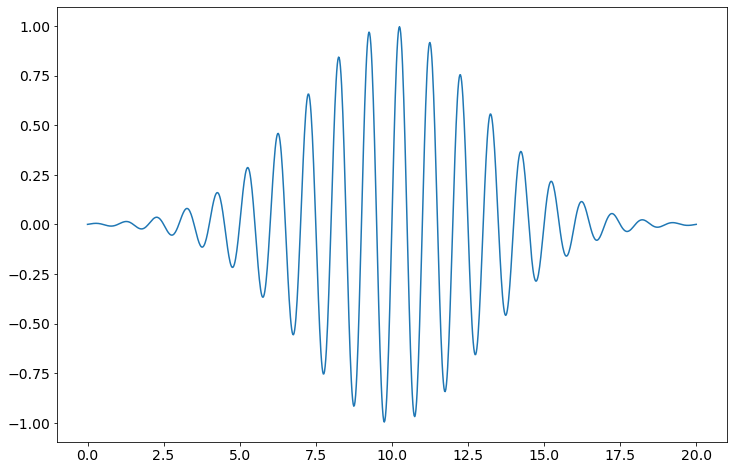

In [8]:
plt.plot(t/tau, gaus_list)

FFT of the envelope

In [9]:
# Want to resolve frequecy

f0 = omega0/(2*np.pi)
f0,omega0

(300000000000000.0, 1884955592153876.0)

Want to resolve frequecy 

omega0 = 1884955592153876.0

f0 = omega0/(2*np.pi) 

f0 = 300000000000000.0

min sample frequency = 2*f0 = 600000000000000.0

dt_max = 1/2*f0 = 1.6666666666666667e-15

our dt must be less than dt_max while fourier transformation for resolution of frequency omega0
dt = 6.666666666666667e-17



In [10]:
dt_max = 1/(2*f0)
dt_max

1.6666666666666666e-15

In [11]:
# t[1]-t[0], dt

In [16]:
dt = t_max/samples
f_max = 1/dt
f = np.linspace(-f_max/2, f_max/2, samples)
omega_fft = 2*np.pi*f

In [17]:
gaus_fft = np.fft.fftshift(np.fft.fft(gaus_list))

Text(0, 0.5, 'E($\\omega$)/Er')

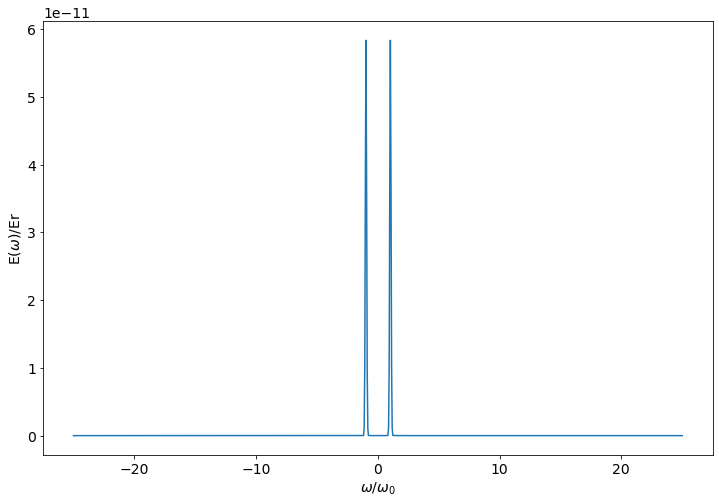

In [19]:
plt.plot(omega_fft/omega0, np.abs(gaus_fft)/Er)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel('E($\omega$)/Er')


(0.0, 5.0)

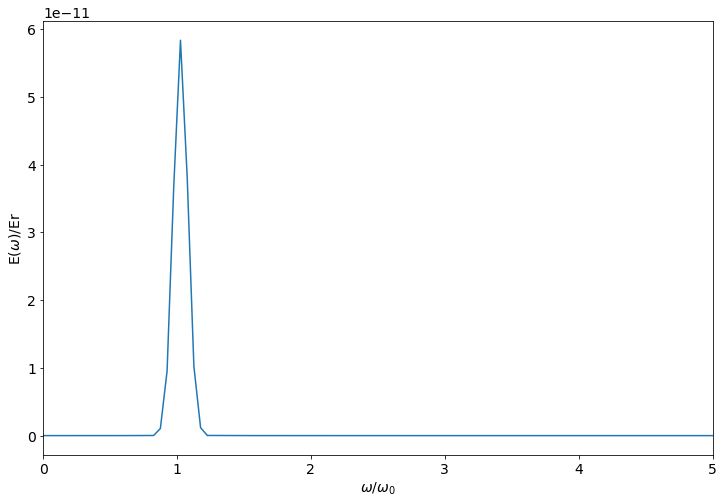

In [20]:
plt.plot(omega_fft/omega0, np.abs(gaus_fft)/Er)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel('E($\omega$)/Er')
plt.xlim(0, 5)

(0.0, 5.0)

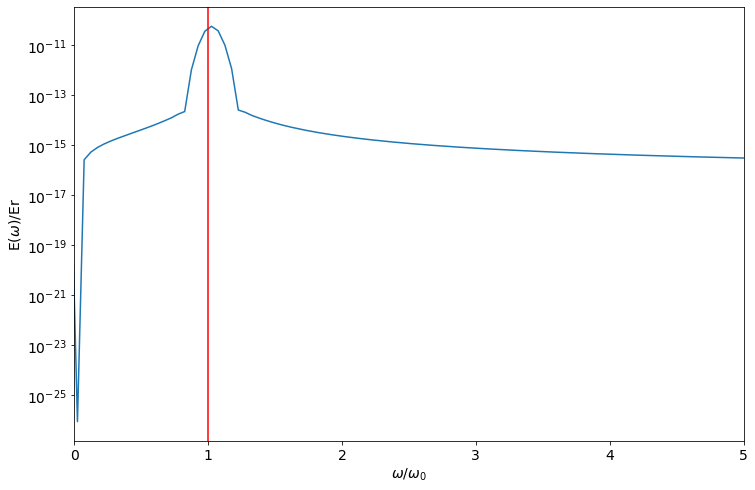

In [21]:
from matplotlib.lines import lineStyles


plt.plot(omega_fft/omega0, np.abs(gaus_fft)/Er)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel('E($\omega$)/Er')
plt.yscale('log')
plt.axvline(1,color='r')
plt.xlim(0, 5)

## Simulation

The maximum time step for resolution of the frequency must be 

In [22]:
omega_to_resolve = 20*omega0
f_to_resolve = omega_to_resolve/(2*np.pi)
min_sampling_freq = 2*f_to_resolve
dt_max_to_resolve = 1/(min_sampling_freq)
print(f"The maximum time step for resolution is {dt_max_to_resolve*1e15: .3f} femto seconds")

The maximum time step for resolution is  0.083 femto seconds


so we take 

dt_snapshot = 0.08 femto seconds

so for fft

f_max = 1/dt_snapshot = 12.5 GHz

omega_max = 2*np.pi*f_max = 78.53981633974483

In [23]:
import glob
import sdf

In [30]:
files = glob.glob('../Diff_laser_env/Gaussian/*.sdf')
files.sort()
len(files)

1669

In [31]:
dt_snapshot

8e-17

In [32]:
t_end/dt_snapshot

1666.6666666666665

In [33]:
t_end

1.3333333333333334e-13

In [34]:
1669*dt_snapshot

1.3352000000000002e-13

In [35]:
files[100]

'../Diff_laser_env/Gaussian/0100.sdf'

In [36]:
# data at time  = 100*dt_snapshot=8e-15 
all_data=sdf.read(files[100])
all_data.Electric_Field_Ey.data.shape

(16000,)

In [37]:
all_data.Electric_Field_Ey.data[0]

38520460498.10228

In [38]:
den = all_data.Derived_Number_Density_Electron.data

### Density Plot

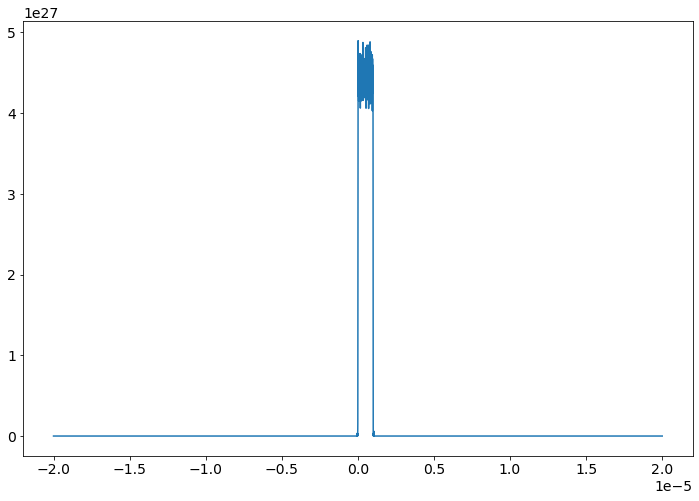

In [39]:
x = np.linspace(x_min, x_max, nx)
t = np.linspace(0, t_end, len(files))
plt.plot(x,den)

Text(0, 0.5, 'n/n$_c$')

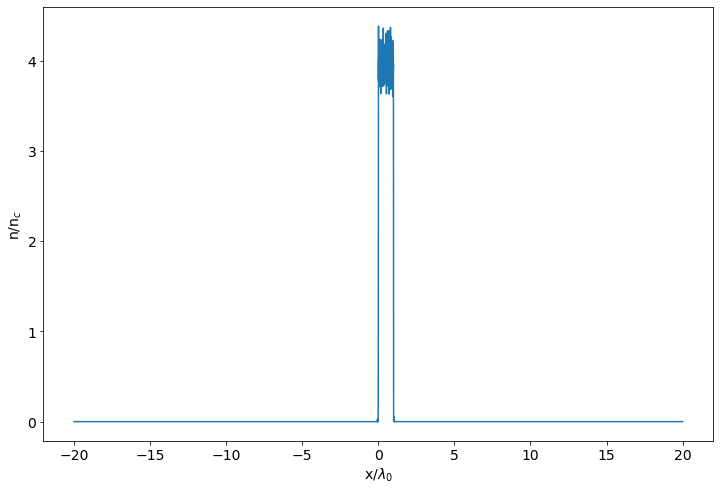

In [40]:
x = np.linspace(x_min, x_max, nx)
t = np.linspace(0, t_end, len(files))
plt.plot(x/lambda0,den/nc)
plt.xlabel('x/$\lambda_0$')
plt.ylabel('n/n$_c$')
# plt.figure(figsize=(12,10))

field at node 0,4000,8000,10000

Text(0, 0.5, 'n/n$_c$')

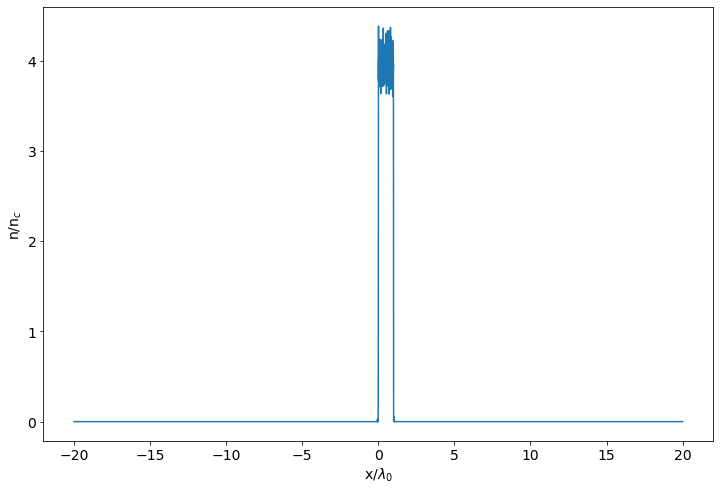

In [41]:
x = np.linspace(x_min, x_max, nx)
t = np.linspace(0, t_end, len(files))
plt.plot(x/lambda0,den/nc)
plt.xlabel('x/$\lambda_0$')
plt.ylabel('n/n$_c$')
# plt.figure(figsize=(12,10))

In [42]:
Ey_0=[]
Ey_4000=[]
Ey_8000=[]
Ey_10000=[]
for f in files:
    E=sdf.read(f).Electric_Field_Ey.data

    Ey_0.append(E[0])
    Ey_4000.append(E[4000])
    Ey_8000.append(E[8000])
    Ey_10000.append(E[10000])
    


In [43]:
Ey_0 = np.array(Ey_0)
Ey_4000 = np.array(Ey_4000)
Ey_8000 = np.array(Ey_8000)
Ey_10000 = np.array(Ey_10000)

Text(0.5, 1.0, 'Ey at zeroth Node')

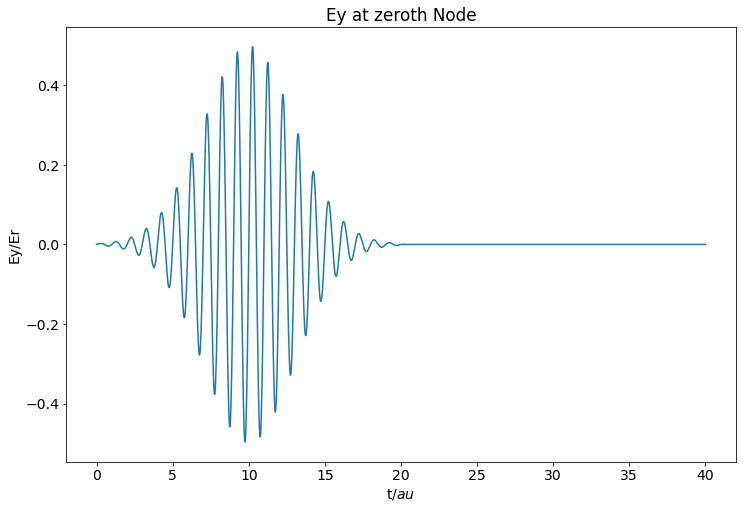

In [44]:
plt.plot(t/tau, Ey_0/Er)
plt.xlabel('t/$\tau$')
plt.ylabel('Ey/Er')
plt.title('Ey at zeroth Node')

Text(0.5, 1.0, 'Ey at 4000th Node')

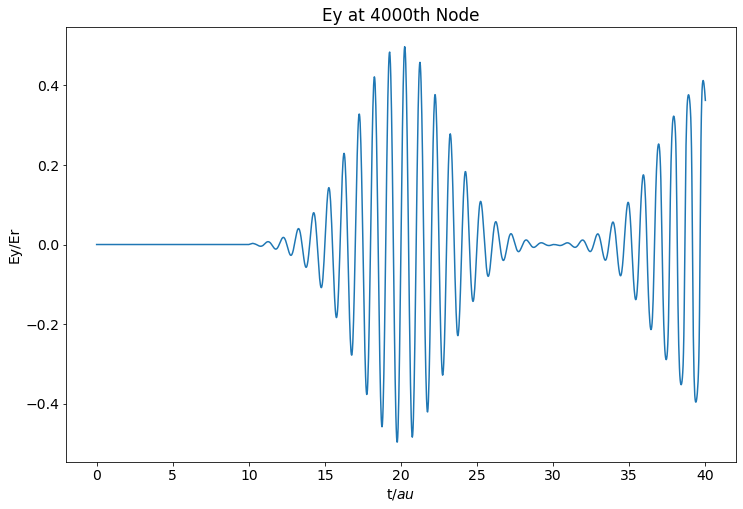

In [45]:
plt.plot(t/tau, Ey_4000/Er)
plt.xlabel('t/$\tau$')
plt.ylabel('Ey/Er')
plt.title('Ey at 4000th Node')

Text(0.5, 1.0, 'Ey at 8000th Node')

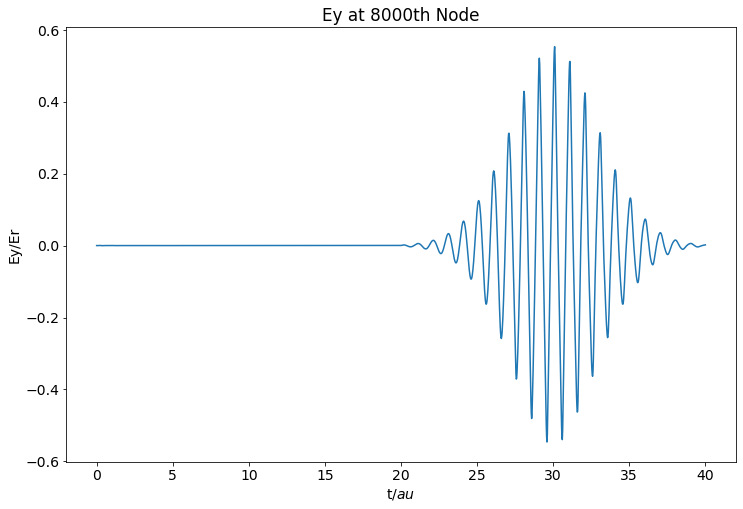

In [46]:
plt.plot(t/tau, Ey_8000/Er)
plt.xlabel('t/$\tau$')
plt.ylabel('Ey/Er')
plt.title('Ey at 8000th Node')

## FFT

In [48]:
f_max = 1/dt_snapshot
samples = len(files)
f = np.linspace(-f_max/2, f_max/2, samples)
omega_fft = 2*np.pi*f


In [49]:
Ey_0_fft = np.fft.fft(Ey_0)
Ey_0_fft = np.fft.fftshift(Ey_0_fft)

In [50]:
Ey_0_fft = np.fft.fft(Ey_0)
Ey_0_fft = np.fft.fftshift(Ey_0_fft)

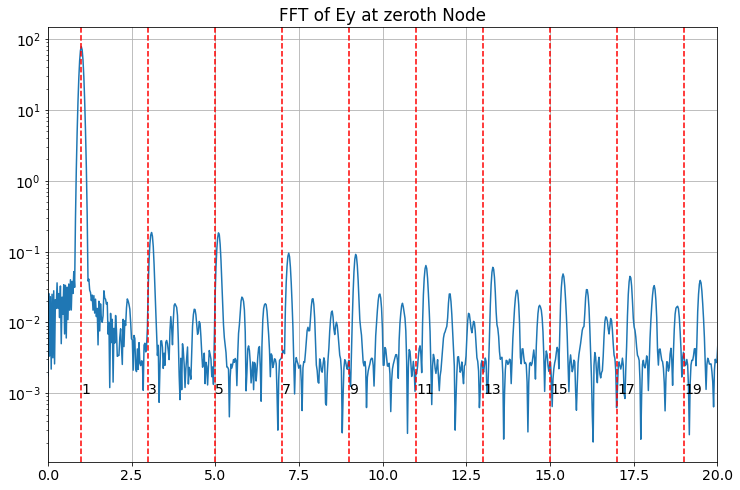

<Figure size 3600x2400 with 0 Axes>

In [51]:
Ey_0_fft = np.fft.fft(Ey_0)
Ey_0_fft = np.fft.fftshift(Ey_0_fft)
plt.plot(omega_fft/omega0, np.abs(Ey_0_fft)/Er)
plt.title('FFT of Ey at zeroth Node')
plt.xlim(0,20)
plt.yscale("log")
plt.grid()
for i in range(1,20,2):
    plt.axvline(i, color='r', linestyle='--')
    plt.annotate(f"{i}",  (i, 1e-3),color='black')
plt.figure(dpi=300);


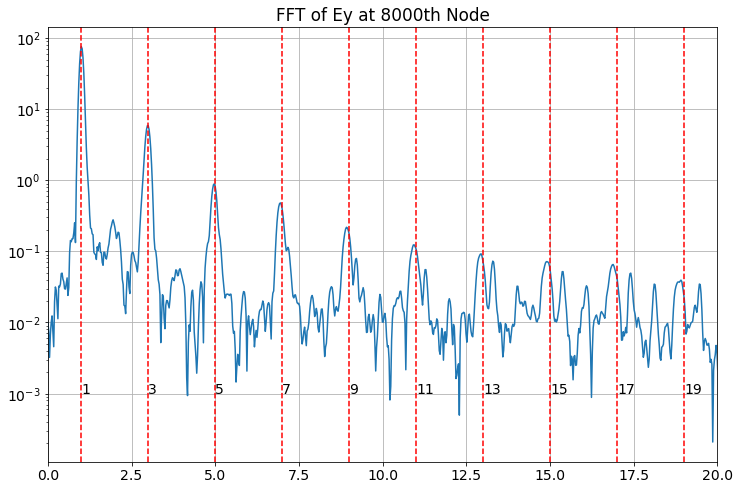

In [52]:
Ey_8000_fft = np.fft.fft(Ey_8000)
Ey_8000_fft = np.fft.fftshift(Ey_8000_fft)
# plt.figure(dpi=300)
plt.plot(omega_fft/omega0, np.abs(Ey_8000_fft)/Er)
plt.xlim(0,20)
plt.title('FFT of Ey at 8000th Node')
plt.yscale("log")
plt.grid()
for i in range(1,20,2):
    plt.axvline(i, color='r', linestyle='--')
    plt.annotate(f"{i}",  (i, 1e-3),color='black')
plt.show()

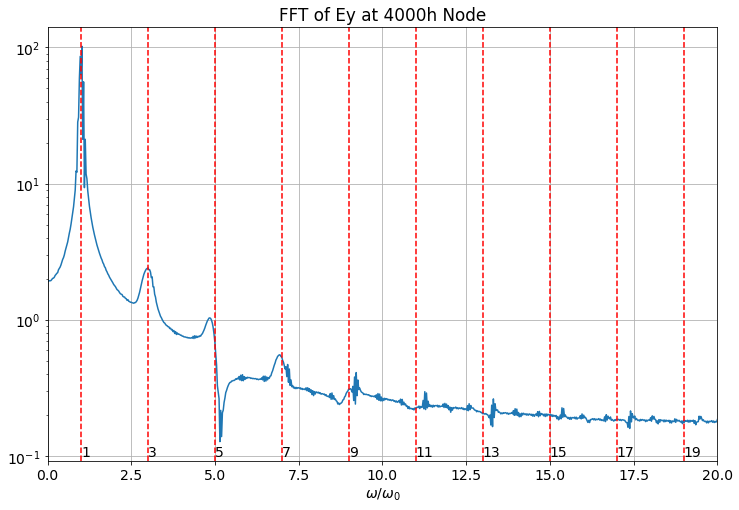

In [54]:
Ey_4000_fft = np.fft.fft(Ey_4000)
Ey_4000_fft = np.fft.fftshift(Ey_4000_fft)
plt.plot(omega_fft/omega0, np.abs(Ey_4000_fft)/Er)
plt.xlim(0,20)
plt.title('FFT of Ey at 4000h Node')
plt.yscale("log")
plt.xlabel('$\omega/\omega_0$')
plt.grid()
for i in range(1,20,2):
    plt.axvline(i, color='r', linestyle='--')
    plt.annotate(f"{i}",  (i, 1e-1),color='black')
plt.show()

In [60]:
len(files)
print("len(files): ",len(files))
arr = np.zeros((len(files),16000))
arr = np.zeros((len(files),16000))
for t in range(0,len(files)):
    arr[t]=sdf.read(files[t]).Derived_Number_Density_Electron.data

print('arr.shape:',arr.shape)


len(files):  1669
arr.shape: (1669, 16000)


In [61]:
arr[:,8000]

array([3.73820717e+27, 3.76860851e+27, 3.74974090e+27, ...,
       3.21422848e+26, 5.93639662e+26, 7.00988743e+26])

In [62]:
EXTENT = [-20, 20, 40, 0]

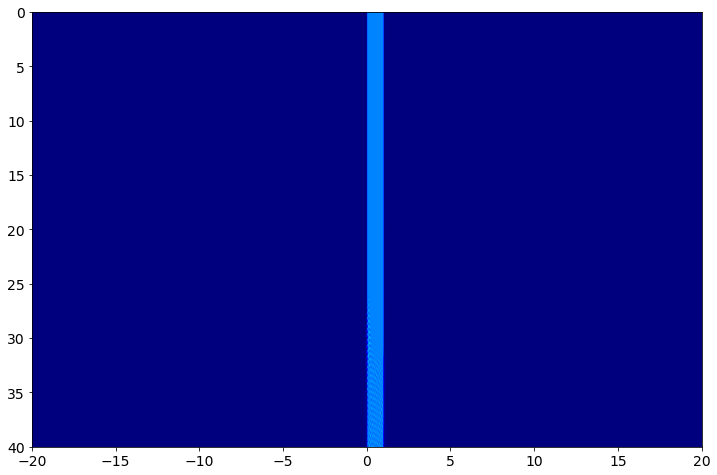

In [63]:
plt.imshow(arr[:, :], extent=EXTENT, aspect="auto", cmap="jet")
# plt.colorbar()

In [64]:
len(files)/40*20

834.5

In [65]:
EXTENT = [-0.25, 0.25, 20, 40]

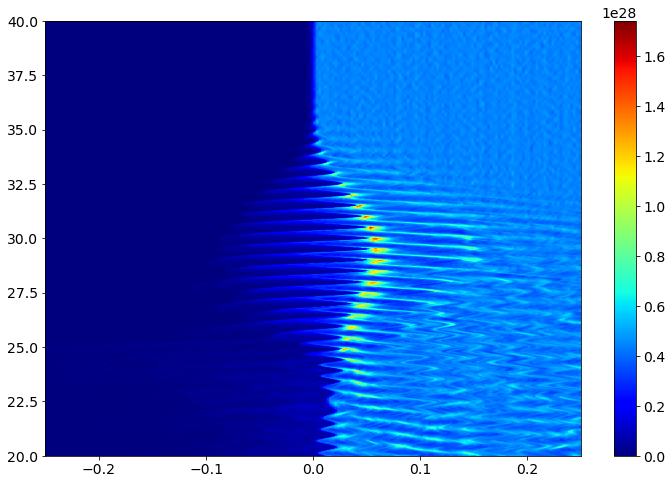

In [66]:
plt.imshow(arr[835:, 7900:8100], extent=EXTENT, aspect="auto", cmap="jet")
plt.colorbar()

In [67]:
t_start = 1300
t_end = 1500
t_max = arr.shape[0]
x_max = arr.shape[1]
x_start = 2*3950
x_end = 2*4100
EXTENT = [-X_MIN*(x_start-NX//2)/x_max,-X_MIN*(x_end-NX//2)/x_max,T_MAX*t_end/t_max,T_MAX*t_start/t_max]
plt.imshow(d[t_start:t_end, x_start:x_end], aspect="auto", extent=EXTENT, cmap="jet")
cmap = colors.ListedColormap(["white"])
plt.colorbar(cmap=cmap)

NameError: name 'X_MIN' is not defined